In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clinical_data = pd.read_csv("TCGA-BRCA.clinical.tsv", sep='\t')
gene_expression_data = pd.read_csv("TCGA-BRCA.star_tpm.tsv", sep='\t', index_col=0)
methylation_data = pd.read_csv("TCGA-BRCA.methylation450.tsv", sep='\t', index_col=0)

In [3]:
methylation_data.head(5)

,TCGA-AQ-A0Y5-01A,TCGA-EW-A2FW-01A,TCGA-C8-A274-01A,TCGA-AC-A62V-01A,TCGA-B6-A0IK-01A,TCGA-E2-A1L7-01A,TCGA-E9-A247-01A,TCGA-AR-A0U0-01A,TCGA-E2-A1LI-01A,TCGA-B6-A0WV-01A,...,TCGA-AC-A2QH-01B,TCGA-GM-A2DO-01A,TCGA-AR-A24Q-01A,TCGA-D8-A1XR-01A,TCGA-E9-A1R2-01A,TCGA-E2-A1IG-01A,TCGA-AR-A2LE-01A,TCGA-BH-A0DI-11A,TCGA-E2-A1IO-01A,TCGA-S3-AA11-01A
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.123206,0.070247,0.095459,0.149745,0.213110,0.239587,0.063008,0.270560,0.292818,0.121228,...,0.120998,0.585586,0.184041,0.147220,0.142033,0.073119,0.180055,0.162520,0.109325,0.129366
cg00000108,0.955195,0.898010,0.973301,0.962013,0.965753,0.967329,0.976577,0.955460,0.970097,0.967188,...,0.925428,0.956575,0.964863,0.958016,0.953898,0.952898,0.960126,0.937975,0.967321,0.969402
cg00000109,0.924968,0.936458,0.926613,0.929127,0.925687,0.953052,0.908876,0.925157,0.911863,0.933134,...,0.762945,0.916745,0.905885,0.936787,0.941583,0.913630,0.962189,0.884476,0.885050,0.812195
cg00000165,0.673627,NaN,0.891222,NaN,0.766033,0.331990,0.859703,NaN,0.550584,NaN,...,0.943078,0.239439,0.808041,0.150880,0.577248,0.722333,0.144171,0.248746,0.205198,0.797948
cg00000236,0.901612,0.803841,0.942629,0.930383,0.902132,0.924075,0.933446,0.917999,0.906572,0.937062,...,0.888120,0.927888,0.917354,0.941404,0.927542,0.928410,0.955338,0.909411,0.919472,0.864668


In [4]:
clinical_data.head(5)
# explore clinical data



,sample,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,...,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,days_to_sample_procurement.samples,is_ffpe.samples,tissue_type.samples,annotations.samples
0,TCGA-BH-A0W3-01A,3c612e12-6de8-44fa-a095-805c45474821,Ductal and Lobular Neoplasms,3c612e12-6de8-44fa-a095-805c45474821,TCGA-BH-A0W3,Breast,Not Reported,white,female,not hispanic or latino,...,85.0,120.0,OCT,801A4E2F-E26E-424F-BF42-CD0D9CD62BCE,True,Solid Tissue,NaN,False,Tumor,NaN
1,TCGA-AR-A24V-01A,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,Ductal and Lobular Neoplasms,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,TCGA-AR-A24V,Breast,Not Reported,white,female,not hispanic or latino,...,1720.0,400.0,OCT,468CD293-C9F7-43C6-A40A-18FCDD22F6AA,True,Solid Tissue,NaN,False,Tumor,NaN
2,TCGA-E9-A1NE-01A,3d676bba-154b-4d22-ab59-d4d4da051b94,Ductal and Lobular Neoplasms,3d676bba-154b-4d22-ab59-d4d4da051b94,TCGA-E9-A1NE,Breast,Not Reported,white,female,not hispanic or latino,...,31.0,280.0,OCT,CF6E29A2-FAE6-45BB-B625-33877887A89E,True,Solid Tissue,NaN,False,Tumor,NaN
3,TCGA-E9-A1NE-11A,3d676bba-154b-4d22-ab59-d4d4da051b94,Ductal and Lobular Neoplasms,3d676bba-154b-4d22-ab59-d4d4da051b94,TCGA-E9-A1NE,Breast,Not Reported,white,female,not hispanic or latino,...,31.0,830.0,OCT,NaN,True,Solid Tissue,NaN,False,Normal,NaN
4,TCGA-AC-A8OQ-01A,dfaabd03-2d40-4422-b210-caf112ff4229,Ductal and Lobular Neoplasms,dfaabd03-2d40-4422-b210-caf112ff4229,TCGA-AC-A8OQ,Breast,Not Reported,black or african american,female,not hispanic or latino,...,742.0,100.0,Unknown,FFA6F9F3-71C1-4AF9-B9F7-0466550EBC90,False,Solid Tissue,NaN,False,Tumor,NaN


In [5]:
gene_expression_data.head(5)

,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,...,TCGA-E2-A1IG-01A,TCGA-E9-A1NA-01A,TCGA-D8-A1JP-01A,TCGA-AR-A252-01A,TCGA-D8-A1XL-01A,TCGA-BH-A0EI-01A,TCGA-E2-A1IO-01A,TCGA-E2-A15R-01A,TCGA-B6-A0IP-01A,TCGA-A1-A0SN-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.662037,3.703721,6.514515,4.784917,4.251984,3.536849,4.645690,6.021755,6.260931,3.613025,...,4.825501,4.142806,4.960919,4.770121,5.276757,6.436490,6.184500,2.670931,6.834395,3.650719
ENSG00000000005.6,3.376096,0.463099,0.000000,2.328061,0.435415,0.736475,1.255622,0.392647,0.467593,0.000000,...,0.134747,0.159500,0.079566,3.312418,0.000000,0.383608,0.755144,0.479644,0.526069,0.059909
ENSG00000000419.13,6.860140,7.086452,6.805072,6.443071,6.178436,6.823355,5.749910,6.977449,6.819887,6.079559,...,6.382933,6.436308,6.994589,6.005000,7.382161,7.220846,6.868277,7.033110,6.384368,8.153019
ENSG00000000457.14,4.400552,4.051007,5.037264,4.374970,3.558464,2.108324,4.487107,4.021000,3.319560,2.287502,...,3.891448,3.765057,4.946796,3.648707,3.664915,3.752192,4.093078,4.831796,4.368028,4.172247
ENSG00000000460.17,2.845169,2.426989,4.043248,4.162790,2.589548,2.277777,2.545178,3.372492,4.023974,1.753177,...,2.557655,2.566596,3.746915,2.494160,3.104957,3.111549,2.538538,3.730901,3.311721,3.301075


In [6]:
clinical_data.columns

Index(['sample', 'id', 'disease_type', 'case_id', 'submitter_id',
       'primary_site', 'alcohol_history.exposures', 'race.demographic',
       'gender.demographic', 'ethnicity.demographic',
       'vital_status.demographic', 'age_at_index.demographic',
       'days_to_birth.demographic', 'year_of_birth.demographic',
       'year_of_death.demographic', 'primary_site.project',
       'project_id.project', 'disease_type.project', 'name.project',
       'name.program.project', 'tissue_source_site_id.tissue_source_site',
       'code.tissue_source_site', 'name.tissue_source_site',
       'project.tissue_source_site', 'bcr_id.tissue_source_site',
       'days_to_death.demographic', 'entity_submitter_id.annotations',
       'notes.annotations', 'submitter_id.annotations',
       'classification.annotations', 'entity_id.annotations',
       'created_datetime.annotations', 'annotation_id.annotations',
       'entity_type.annotations', 'updated_datetime.annotations',
       'case_id.annotation

<AxesSubplot:>

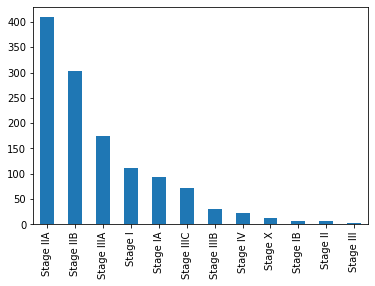

In [7]:
# take ajcc_pathologic_stage.diagnoses column of clinical data
clinical_data['ajcc_pathologic_stage.diagnoses'].value_counts()

# visualize the distribution of the ajcc_pathologic_stage.diagnoses column
clinical_data['ajcc_pathologic_stage.diagnoses'].value_counts().plot(kind='bar')

# Stage X: unknown stage

In [8]:
clinical_data["age_at_index.demographic"].value_counts()

62.0    59
63.0    44
56.0    40
54.0    39
58.0    37
        ..
32.0     2
26.0     2
27.0     1
86.0     1
33.0     1
Name: age_at_index.demographic, Length: 65, dtype: int64

### Preprocessing

Preprocess Gene Expression Data:

In [9]:
gene_expression_data = gene_expression_data.apply(pd.to_numeric, errors='coerce')


In [10]:
gene_expression_data.head(5)

,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,...,TCGA-E2-A1IG-01A,TCGA-E9-A1NA-01A,TCGA-D8-A1JP-01A,TCGA-AR-A252-01A,TCGA-D8-A1XL-01A,TCGA-BH-A0EI-01A,TCGA-E2-A1IO-01A,TCGA-E2-A15R-01A,TCGA-B6-A0IP-01A,TCGA-A1-A0SN-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.662037,3.703721,6.514515,4.784917,4.251984,3.536849,4.645690,6.021755,6.260931,3.613025,...,4.825501,4.142806,4.960919,4.770121,5.276757,6.436490,6.184500,2.670931,6.834395,3.650719
ENSG00000000005.6,3.376096,0.463099,0.000000,2.328061,0.435415,0.736475,1.255622,0.392647,0.467593,0.000000,...,0.134747,0.159500,0.079566,3.312418,0.000000,0.383608,0.755144,0.479644,0.526069,0.059909
ENSG00000000419.13,6.860140,7.086452,6.805072,6.443071,6.178436,6.823355,5.749910,6.977449,6.819887,6.079559,...,6.382933,6.436308,6.994589,6.005000,7.382161,7.220846,6.868277,7.033110,6.384368,8.153019
ENSG00000000457.14,4.400552,4.051007,5.037264,4.374970,3.558464,2.108324,4.487107,4.021000,3.319560,2.287502,...,3.891448,3.765057,4.946796,3.648707,3.664915,3.752192,4.093078,4.831796,4.368028,4.172247
ENSG00000000460.17,2.845169,2.426989,4.043248,4.162790,2.589548,2.277777,2.545178,3.372492,4.023974,1.753177,...,2.557655,2.566596,3.746915,2.494160,3.104957,3.111549,2.538538,3.730901,3.311721,3.301075


In [11]:
# Preprocessing gene expression data
gene_expression_values = gene_expression_data.values.flatten()

total_nans = gene_expression_data.isna().sum().sum()
print(f"Total NaN values: {total_nans}")



Total NaN values: 0


In [12]:
print(gene_expression_data)

                    TCGA-D8-A146-01A  TCGA-AQ-A0Y5-01A  TCGA-C8-A274-01A  \
Ensembl_ID                                                                 
ENSG00000000003.15          5.662037          3.703721          6.514515   
ENSG00000000005.6           3.376096          0.463099          0.000000   
ENSG00000000419.13          6.860140          7.086452          6.805072   
ENSG00000000457.14          4.400552          4.051007          5.037264   
ENSG00000000460.17          2.845169          2.426989          4.043248   
...                              ...               ...               ...   
ENSG00000288669.1           0.000000          0.000000          0.000000   
ENSG00000288670.1           3.533999          4.773448          4.701710   
ENSG00000288671.1           0.000000          0.000000          0.000000   
ENSG00000288674.1           0.058109          0.054779          0.093425   
ENSG00000288675.1           1.122739          1.243182          0.604261   

           

In [13]:
# Filter out lowly expressed genes
# Keep genes with TPM > 1 in at least 20% of samples

print(gene_expression_data.shape)
min_exp = 1
min_samples = int(gene_expression_data.shape[1] * 0.2)
mask = (gene_expression_data > min_exp).sum(axis=1) >= min_samples
gene_expression_data = gene_expression_data.loc[mask]

print(gene_expression_data.shape)

(60660, 1226)
(20683, 1226)


60000 gene -> 20000 gene

In [14]:
from mygene import MyGeneInfo
import requests
import time

In [15]:
gene_df = gene_expression_data.copy()
gene_df.index = gene_df.index.str.split('.').str[0]  # remove version

ensembl_ids = list(gene_df.index.unique())

# Helper to query 50 IDs at a time
def fetch_chromosomes(ids):
    """
    Posts a list of Ensembl gene IDs (max 100) to Ensembl REST API
    and returns a dict {ensembl_id: chromosome}.
    """
    url = "https://rest.ensembl.org/lookup/id"
    headers = {"Content-Type": "application/json", "Accept": "application/json"}
    data = {"ids": ids}
    resp = requests.post(url, headers=headers, json=data)
    resp.raise_for_status()
    results = resp.json()
    # extract only those that returned a valid entry
    return {gid: info.get("seq_region_name") # gid: gene id
            for gid, info in results.items() 
            if info is not None}

# iterate in batches
chrom_map = {}
batch_size = 50
for i in range(0, len(ensembl_ids), batch_size):
    print(f"Sample nr. {i}")
    batch = ensembl_ids[i : i + batch_size]
    chrom_map.update(fetch_chromosomes(batch))
    time.sleep(0.5)

# df of the results
chrom_df = (
    pd.Series(chrom_map)
      .rename("chromosome")
      .to_frame()
)

print(chrom_df)


Sample nr. 0
Sample nr. 50
Sample nr. 100
Sample nr. 150
Sample nr. 200
Sample nr. 250
Sample nr. 300
Sample nr. 350
Sample nr. 400
Sample nr. 450
Sample nr. 500
Sample nr. 550
Sample nr. 600
Sample nr. 650
Sample nr. 700
Sample nr. 750
Sample nr. 800
Sample nr. 850
Sample nr. 900
Sample nr. 950
Sample nr. 1000
Sample nr. 1050
Sample nr. 1100
Sample nr. 1150
Sample nr. 1200
Sample nr. 1250
Sample nr. 1300
Sample nr. 1350
Sample nr. 1400
Sample nr. 1450
Sample nr. 1500
Sample nr. 1550
Sample nr. 1600
Sample nr. 1650
Sample nr. 1700
Sample nr. 1750
Sample nr. 1800
Sample nr. 1850
Sample nr. 1900
Sample nr. 1950
Sample nr. 2000
Sample nr. 2050
Sample nr. 2100
Sample nr. 2150
Sample nr. 2200
Sample nr. 2250
Sample nr. 2300
Sample nr. 2350
Sample nr. 2400
Sample nr. 2450
Sample nr. 2500
Sample nr. 2550
Sample nr. 2600
Sample nr. 2650
Sample nr. 2700
Sample nr. 2750
Sample nr. 2800
Sample nr. 2850
Sample nr. 2900
Sample nr. 2950
Sample nr. 3000
Sample nr. 3050
Sample nr. 3100
Sample nr. 3150

In [16]:
print(chrom_df["chromosome"].value_counts(dropna=False))

1     2124
19    1438
2     1395
17    1206
11    1125
3     1110
12    1071
7     1060
6     1034
16     922
5      911
10     789
9      773
14     772
4      753
8      707
X      661
15     639
20     535
22     524
13     336
18     308
21     222
MT      26
Y        5
Name: chromosome, dtype: int64


In [17]:
print(clinical_data["gender.demographic"].value_counts(dropna=False))

female    1241
male        13
NaN          1
Name: gender.demographic, dtype: int64


In [18]:
# Filter our sex chromosomes

# Remove versions in‐place
gene_expression_data.index = gene_expression_data.index.str.split('.').str[0]

# Now chrom_df.index and gene_expression_data.index match exactly
xy_genes = chrom_df.loc[chrom_df['chromosome'].isin(['X','Y'])].index
gene_expression_data = gene_expression_data.drop(index=xy_genes)


In [19]:
gene_expression_data
# 20683 -> 20017

,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,...,TCGA-E2-A1IG-01A,TCGA-E9-A1NA-01A,TCGA-D8-A1JP-01A,TCGA-AR-A252-01A,TCGA-D8-A1XL-01A,TCGA-BH-A0EI-01A,TCGA-E2-A1IO-01A,TCGA-E2-A15R-01A,TCGA-B6-A0IP-01A,TCGA-A1-A0SN-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,6.860140,7.086452,6.805072,6.443071,6.178436,6.823355,5.749910,6.977449,6.819887,6.079559,...,6.382933,6.436308,6.994589,6.005000,7.382161,7.220846,6.868277,7.033110,6.384368,8.153019
ENSG00000000457,4.400552,4.051007,5.037264,4.374970,3.558464,2.108324,4.487107,4.021000,3.319560,2.287502,...,3.891448,3.765057,4.946796,3.648707,3.664915,3.752192,4.093078,4.831796,4.368028,4.172247
ENSG00000000460,2.845169,2.426989,4.043248,4.162790,2.589548,2.277777,2.545178,3.372492,4.023974,1.753177,...,2.557655,2.566596,3.746915,2.494160,3.104957,3.111549,2.538538,3.730901,3.311721,3.301075
ENSG00000000938,3.579965,2.322361,2.124130,3.122375,1.508581,2.357299,2.954327,2.234195,4.159678,1.117230,...,2.855133,3.806912,3.021800,4.176538,3.290646,2.510101,3.344175,2.045024,2.728682,3.094067
ENSG00000000971,4.996181,4.943860,2.993348,4.754674,3.722149,2.899195,5.550208,5.319824,4.140615,2.477962,...,4.851329,5.256807,5.134352,5.644776,3.692974,4.327587,5.678745,3.245785,3.895341,5.100187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288586,1.212009,0.695727,0.834549,0.660746,1.477833,0.753177,0.583712,0.763072,1.218471,0.176578,...,1.561106,1.212507,0.372506,0.649478,0.999711,0.652509,1.291427,1.687867,1.080521,0.795518
ENSG00000288596,2.452964,1.756596,2.212818,2.209079,2.761541,2.226293,2.335855,3.212056,2.736302,1.002378,...,1.810813,1.627513,3.343081,2.163112,2.390145,2.271575,2.409581,3.259800,2.692628,1.392592
ENSG00000288612,1.285580,1.662433,0.876330,0.884246,0.970412,1.141237,0.693498,0.655443,1.884285,0.852638,...,1.241657,1.002450,1.224719,0.877901,1.255259,1.958249,1.212569,1.269093,1.493391,0.448055


In [20]:
# filter out male and nan (keep females) from gene expression, clinical, methylation data

# Select only the female samples from clinical_data
female_clinical = clinical_data[
    clinical_data["gender.demographic"] == "female"
].copy()

# # 1) Build a Series of short IDs from your long column names
# #    e.g. 'TCGA-02-0001-01A-11R-1234-07' → 'TCGA-02-0001'
# short_expr_ids = (
#     pd.Index(gene_expression_data.columns)
#       .str.split('-')
#       .str[:3]
#       .str.join('-')
# )

# short_meth_ids = (
#     pd.Index(methylation_data.columns)
#       .str.split('-')
#       .str[:3]
#       .str.join('-')
# )

# 2) Make masks of which columns correspond to female submitters
female_ids = set(female_clinical['sample'])

expr_mask = gene_expression_data.columns.isin(female_ids)
print(f"Keeping {expr_mask.sum()} / {gene_expression_data.shape[1]} expression columns")
gene_expression_female = gene_expression_data.loc[:, expr_mask].copy()

# 4) Filter the methylation matrix the same way
meth_mask = methylation_data.columns.isin(female_ids)
print(f"Keeping {meth_mask.sum()} / {methylation_data.shape[1]} methylation columns")
methylation_female = methylation_data.loc[:, meth_mask].copy()

# # Get the list of female sample IDs
# female_ids = female_clinical["submitter_id_short"].to_list()

# # Filter gene expression data to keep only those columns
# gene_expression_female = gene_expression_data.loc[:, gene_expression_data.columns.isin(female_ids)].copy()

# # Filter methylation data the same way
# methylation_female = methylation_data.loc[:, methylation_data.columns.isin(female_ids)].copy()


Keeping 1212 / 1226 expression columns
Keeping 883 / 893 methylation columns


In [21]:
# count NaN value ratio in methylation data
total_cells = methylation_female.size
total_nans  = methylation_female.isna().sum().sum()
nan_ratio   = total_nans / total_cells
print(f"Overall NaN ratio: {nan_ratio:.2%}")

Overall NaN ratio: 15.55%


In [22]:
clin_ids = set(clinical_data['sample'])
expr_ids = set(gene_expression_data.columns)
meth_ids = set(methylation_data.columns)

# 2) Compute the intersection
common_ids = clin_ids & expr_ids & meth_ids

# 3) Report how many match
print(f"{len(common_ids)} samples are present in all three datasets.")



876 samples are present in all three datasets.


In [23]:
# Z-score normalization transforms each gene so that:
#     Mean expression across samples = 0
#     Standard deviation across samples = 1
# This makes expression comparable across genes, which is helpful for:
#     PCA
#     Clustering
#     Heatmaps
# Step 1: Remove constant-expression genes
nonconstant_genes = gene_expression_female.std(axis=1) != 0
filtered_gene_expression = gene_expression_female[nonconstant_genes]

# Step 2: Apply z-score normalization
zscore_gene_expression_female = filtered_gene_expression.sub(
    filtered_gene_expression.mean(axis=1), axis=0
).div(filtered_gene_expression.std(axis=1), axis=0)


In [24]:
female_gene_expression_values = gene_expression_female.values.flatten()

total_nans = gene_expression_female.isna().sum().sum()
print(f"Total NaN values: {total_nans}")

Total NaN values: 0


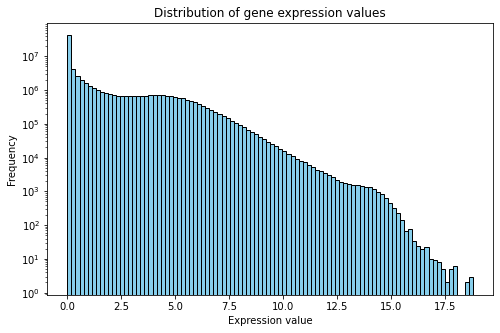

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(gene_expression_values, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Expression value')
plt.ylabel('Frequency')
plt.title('Distribution of gene expression values')
plt.yscale('log')
plt.show()

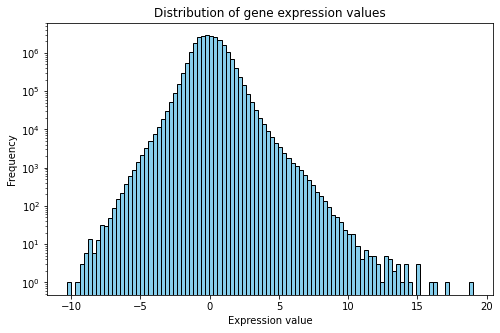

In [26]:
z_values = zscore_gene_expression_female.values.flatten()

plt.figure(figsize=(8, 5))
plt.hist(z_values, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Expression value')
plt.ylabel('Frequency')
plt.title('Distribution of gene expression values')
plt.yscale('log')
plt.show()

In [27]:
X = zscore_gene_expression_female.T  # shape: (samples, genes), for PCA


In [28]:
# Check for any NaNs or infs
print(np.isnan(X.values).sum(), "NaNs")
print(np.isinf(X.values).sum(), "infs")


0 NaNs
0 infs


In [29]:
zscore_gene_expression_female.shape

(20017, 1212)

Methylation Data Preprocessing:

In [30]:
import GEOparse

# Download the GPL13534 platform annotation (Illumina 450)
gpl = GEOparse.get_GEO(geo="GPL13534", destdir=".")
platform = gpl.table

# Inspect column names and pick the one with chromosome info
print(platform.columns.tolist())

# Adapt the chromosome column
platform['chr'] = (
    platform['CHR']
      .astype(str)
      .str.replace('chr', '', regex=False)  # drop any 'chr' prefix
      .str.upper()                          # e.g. 'X', 'Y', '1'...
)

# Keep only autosomes 1–22
autosomes = platform.loc[
    platform['chr'].isin([str(i) for i in range(1,23)]),
    'ID'
].unique()


# Filter methylation_female DataFrame
methylation_autosomal_female = methylation_female.loc[
    methylation_female.index.intersection(autosomes)
].copy()


print(f"Dropped {methylation_female.shape[0] - methylation_autosomal_female.shape[0]} sex-chr probes; "
      f"{methylation_autosomal_female.shape[0]} remain.")

25-Jul-2025 15:40:22 DEBUG utils - Directory . already exists. Skipping.
25-Jul-2025 15:40:22 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL13534&form=text&view=full to .\GPL13534.txt
25-Jul-2025 15:40:24 DEBUG downloader - Total size: 0
25-Jul-2025 15:40:24 DEBUG downloader - md5: None
207MB [00:28, 7.54MB/s] 
25-Jul-2025 15:40:53 DEBUG downloader - Moving C:\Users\igali\AppData\Local\Temp\tmpkyh9tb_i to c:\Users\igali\OneDrive\Desktop\Bioinfo\SoSe 25\Data Science\dsls_final_project\GPL13534.txt
25-Jul-2025 15:40:53 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL13534&form=text&view=full
25-Jul-2025 15:40:53 INFO GEOparse - Parsing .\GPL13534.txt: 
25-Jul-2025 15:40:53 DEBUG GEOparse - PLATFORM: GPL13534
c:\Users\igali\anaconda3\lib\site-packages\GEOparse\GEOparse.py:401: DtypeWarning: Columns (11,14,15,36) have mixed types. Specify dtype option on import or set low_memory=False.
  

['ID', 'Name', 'AddressA_ID', 'AlleleA_ProbeSeq', 'AddressB_ID', 'AlleleB_ProbeSeq', 'Infinium_Design_Type', 'Next_Base', 'Color_Channel', 'Forward_Sequence', 'Genome_Build', 'CHR', 'MAPINFO', 'SourceSeq', 'Chromosome_36', 'Coordinate_36', 'Strand', 'Probe_SNPs', 'Probe_SNPs_10', 'Random_Loci', 'Methyl27_Loci', 'UCSC_RefGene_Name', 'UCSC_RefGene_Accession', 'UCSC_RefGene_Group', 'UCSC_CpG_Islands_Name', 'Relation_to_UCSC_CpG_Island', 'Phantom', 'DMR', 'Enhancer', 'HMM_Island', 'Regulatory_Feature_Name', 'Regulatory_Feature_Group', 'DHS', 'RANGE_START', 'RANGE_END', 'RANGE_GB', 'SPOT_ID']
Dropped 22939 sex-chr probes; 463488 remain.


In [31]:
# Compute fraction missing per probe
missing_frac = methylation_autosomal_female.isna().mean(axis=1)

# max-allowed missing fraction : 20%
max_missing = 0.20

# Build a boolean mask of probes to keep
keep_probes = missing_frac <= max_missing

methylation_autosomal_female = methylation_autosomal_female.loc[keep_probes]

print(f"Dropped {len(missing_frac) - keep_probes.sum()} probes; "
      f"{keep_probes.sum()} remain.")

Dropped 78813 probes; 384675 remain.


In [32]:
methylation_autosomal_female

,TCGA-AQ-A0Y5-01A,TCGA-EW-A2FW-01A,TCGA-C8-A274-01A,TCGA-B6-A0IK-01A,TCGA-E2-A1L7-01A,TCGA-E9-A247-01A,TCGA-AR-A0U0-01A,TCGA-E2-A1LI-01A,TCGA-B6-A0WV-01A,TCGA-A2-A0SV-01A,...,TCGA-AC-A2QH-01B,TCGA-GM-A2DO-01A,TCGA-AR-A24Q-01A,TCGA-D8-A1XR-01A,TCGA-E9-A1R2-01A,TCGA-E2-A1IG-01A,TCGA-AR-A2LE-01A,TCGA-BH-A0DI-11A,TCGA-E2-A1IO-01A,TCGA-S3-AA11-01A
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.123206,0.070247,0.095459,0.213110,0.239587,0.063008,0.270560,0.292818,0.121228,0.153671,...,0.120998,0.585586,0.184041,0.147220,0.142033,0.073119,0.180055,0.162520,0.109325,0.129366
cg00000108,0.955195,0.898010,0.973301,0.965753,0.967329,0.976577,0.955460,0.970097,0.967188,0.955105,...,0.925428,0.956575,0.964863,0.958016,0.953898,0.952898,0.960126,0.937975,0.967321,0.969402
cg00000109,0.924968,0.936458,0.926613,0.925687,0.953052,0.908876,0.925157,0.911863,0.933134,0.929435,...,0.762945,0.916745,0.905885,0.936787,0.941583,0.913630,0.962189,0.884476,0.885050,0.812195
cg00000165,0.673627,NaN,0.891222,0.766033,0.331990,0.859703,NaN,0.550584,NaN,0.475518,...,0.943078,0.239439,0.808041,0.150880,0.577248,0.722333,0.144171,0.248746,0.205198,0.797948
cg00000236,0.901612,0.803841,0.942629,0.902132,0.924075,0.933446,0.917999,0.906572,0.937062,0.912985,...,0.888120,0.927888,0.917354,0.941404,0.927542,0.928410,0.955338,0.909411,0.919472,0.864668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.9.90621653R,0.043094,0.027733,0.053193,0.042356,0.033072,0.039906,0.043682,0.046299,0.039285,0.024463,...,0.108937,0.029395,0.078529,0.039454,0.048462,0.032552,0.030692,0.033054,0.062862,0.051925
ch.9.93373462R,0.020047,0.022806,0.018555,0.014524,0.018194,0.022819,0.023388,0.028544,0.019657,0.014101,...,0.019240,0.020429,0.027198,0.020005,0.022561,0.018404,0.019993,0.018962,0.018224,0.020923
ch.9.93402636R,0.058433,0.038575,0.039519,0.046850,0.033207,0.029560,0.033808,0.037955,0.050433,0.027076,...,0.037027,0.051441,0.057234,0.023970,0.070286,0.037604,0.043277,0.030892,0.074530,0.066430


In [33]:
# Drop probes that map to more than one gene (ambigious, overlapping features)
# gpl.table has a column called UCSC_RefGene_Name which, for each probe, lists the gene(s) it overlaps 
# (semicolon-separated if more than one). We can simply keep only those probes that hit exactly one gene

def maps_to_single_gene(x):
    if pd.isna(x) or x == '':
        return False
    genes = x.split(';')
    return len(set(genes)) == 1

mask = platform['UCSC_RefGene_Name'].apply(maps_to_single_gene)
single_gene_probes = platform.loc[mask, 'ID'].unique()

# Compute the intersection with autosomal×female probes
all_single = set(single_gene_probes)
in_matrix = set(methylation_autosomal_female.index)
keep = all_single & in_matrix

print(f"Of {len(all_single)} single-gene probes, {len(keep)} are in our matrix")

# Filter the methylation_autosomal_female DataFrame to that set
methylation_autosomal_female = methylation_autosomal_female.loc[
    methylation_autosomal_female.index.isin(keep)
].copy()

print("Now methylation_autosomal_female has", methylation_autosomal_female.shape[0], "probes.")

Of 332010 single-gene probes, 269786 are in our matrix
Now methylation_autosomal_female has 269786 probes.


In [34]:
methylation_autosomal_female

,TCGA-AQ-A0Y5-01A,TCGA-EW-A2FW-01A,TCGA-C8-A274-01A,TCGA-B6-A0IK-01A,TCGA-E2-A1L7-01A,TCGA-E9-A247-01A,TCGA-AR-A0U0-01A,TCGA-E2-A1LI-01A,TCGA-B6-A0WV-01A,TCGA-A2-A0SV-01A,...,TCGA-AC-A2QH-01B,TCGA-GM-A2DO-01A,TCGA-AR-A24Q-01A,TCGA-D8-A1XR-01A,TCGA-E9-A1R2-01A,TCGA-E2-A1IG-01A,TCGA-AR-A2LE-01A,TCGA-BH-A0DI-11A,TCGA-E2-A1IO-01A,TCGA-S3-AA11-01A
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.123206,0.070247,0.095459,0.213110,0.239587,0.063008,0.270560,0.292818,0.121228,0.153671,...,0.120998,0.585586,0.184041,0.147220,0.142033,0.073119,0.180055,0.162520,0.109325,0.129366
cg00000108,0.955195,0.898010,0.973301,0.965753,0.967329,0.976577,0.955460,0.970097,0.967188,0.955105,...,0.925428,0.956575,0.964863,0.958016,0.953898,0.952898,0.960126,0.937975,0.967321,0.969402
cg00000109,0.924968,0.936458,0.926613,0.925687,0.953052,0.908876,0.925157,0.911863,0.933134,0.929435,...,0.762945,0.916745,0.905885,0.936787,0.941583,0.913630,0.962189,0.884476,0.885050,0.812195
cg00000236,0.901612,0.803841,0.942629,0.902132,0.924075,0.933446,0.917999,0.906572,0.937062,0.912985,...,0.888120,0.927888,0.917354,0.941404,0.927542,0.928410,0.955338,0.909411,0.919472,0.864668
cg00000292,0.759490,0.875491,0.450042,0.615725,0.697031,0.871707,0.730424,0.613975,0.756442,0.578999,...,0.455817,0.877052,0.703864,0.437056,0.544087,0.392265,0.593645,0.774232,0.398301,0.925828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.9.2549180R,0.064118,0.056878,0.047993,0.043898,0.046824,0.047555,0.075014,0.061646,0.090734,0.049363,...,0.089831,0.057961,0.048551,0.056100,0.044311,0.041133,0.041578,0.067810,0.042320,0.060881
ch.9.357218F,0.054825,0.044748,0.052646,0.052667,0.036864,0.050781,0.040166,0.055545,0.091716,0.056969,...,0.028597,0.049674,0.075937,0.049551,0.062901,0.037342,0.037377,0.033017,0.040562,0.054809
ch.9.377428R,0.062613,0.051138,0.053299,0.066857,0.045527,0.076074,0.055250,0.057845,0.089765,0.062563,...,0.043450,0.060268,0.086903,0.048622,0.084502,0.043849,0.059966,0.049659,0.055964,0.046301


CPM stands for Counts Per Million. It’s a simple library‐size normalization: you take each feature’s raw count (or intensity), divide by the total counts in that sample, and multiply by one million so samples with different depths become comparable.

In [35]:
# drop probes that have very low total signal across our cohort, using a “CPM > 1 in ≥ 20 % of samples” rule
# Filter out low variance probes, which are unlikely to be informative for downstream analyses.

# 1) Compute “library size” per sample (sum of Beta-values)
lib_sizes = methylation_autosomal_female.sum(axis=0)

# 2) Convert to CPM
cpm = methylation_autosomal_female.div(lib_sizes, axis=1) * 1e6

# 3) Keep probes with CPM > 1 in at least 20% of samples
min_frac = 0.20
keep_mask = (cpm > 1).sum(axis=1) >= (min_frac * methylation_autosomal_female.shape[1])

# 4) Subset
methylation_filtered = methylation_autosomal_female.loc[keep_mask].copy()

print(
    f"Dropped {methylation_autosomal_female.shape[0] - methylation_filtered.shape[0]} "
    f"low-signal probes; {methylation_filtered.shape[0]} remain."
)

Dropped 80689 low-signal probes; 189097 remain.


In [36]:
female_clinical

,sample,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,...,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,days_to_sample_procurement.samples,is_ffpe.samples,tissue_type.samples,annotations.samples
0,TCGA-BH-A0W3-01A,3c612e12-6de8-44fa-a095-805c45474821,Ductal and Lobular Neoplasms,3c612e12-6de8-44fa-a095-805c45474821,TCGA-BH-A0W3,Breast,Not Reported,white,female,not hispanic or latino,...,85.0,120.0,OCT,801A4E2F-E26E-424F-BF42-CD0D9CD62BCE,True,Solid Tissue,NaN,False,Tumor,NaN
1,TCGA-AR-A24V-01A,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,Ductal and Lobular Neoplasms,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,TCGA-AR-A24V,Breast,Not Reported,white,female,not hispanic or latino,...,1720.0,400.0,OCT,468CD293-C9F7-43C6-A40A-18FCDD22F6AA,True,Solid Tissue,NaN,False,Tumor,NaN
2,TCGA-E9-A1NE-01A,3d676bba-154b-4d22-ab59-d4d4da051b94,Ductal and Lobular Neoplasms,3d676bba-154b-4d22-ab59-d4d4da051b94,TCGA-E9-A1NE,Breast,Not Reported,white,female,not hispanic or latino,...,31.0,280.0,OCT,CF6E29A2-FAE6-45BB-B625-33877887A89E,True,Solid Tissue,NaN,False,Tumor,NaN
3,TCGA-E9-A1NE-11A,3d676bba-154b-4d22-ab59-d4d4da051b94,Ductal and Lobular Neoplasms,3d676bba-154b-4d22-ab59-d4d4da051b94,TCGA-E9-A1NE,Breast,Not Reported,white,female,not hispanic or latino,...,31.0,830.0,OCT,NaN,True,Solid Tissue,NaN,False,Normal,NaN
4,TCGA-AC-A8OQ-01A,dfaabd03-2d40-4422-b210-caf112ff4229,Ductal and Lobular Neoplasms,dfaabd03-2d40-4422-b210-caf112ff4229,TCGA-AC-A8OQ,Breast,Not Reported,black or african american,female,not hispanic or latino,...,742.0,100.0,Unknown,FFA6F9F3-71C1-4AF9-B9F7-0466550EBC90,False,Solid Tissue,NaN,False,Tumor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,TCGA-BH-A1FH-11B,1783cac1-253a-40af-a9ac-48dfb20e1ab8,Ductal and Lobular Neoplasms,1783cac1-253a-40af-a9ac-48dfb20e1ab8,TCGA-BH-A1FH,Breast,Not Reported,white,female,not hispanic or latino,...,4670.0,280.0,Unknown,NaN,False,Solid Tissue,NaN,False,Normal,NaN
1251,TCGA-BH-A1FH-01A,1783cac1-253a-40af-a9ac-48dfb20e1ab8,Ductal and Lobular Neoplasms,1783cac1-253a-40af-a9ac-48dfb20e1ab8,TCGA-BH-A1FH,Breast,Not Reported,white,female,not hispanic or latino,...,4670.0,430.0,OCT,501C3E1B-573B-4A5A-A0ED-3CD15432E6FF,True,Solid Tissue,NaN,False,Tumor,NaN
1252,TCGA-AR-A1AO-01A,623befd6-0ca4-4a6c-9cf5-d9385c3b718f,Ductal and Lobular Neoplasms,623befd6-0ca4-4a6c-9cf5-d9385c3b718f,TCGA-AR-A1AO,Breast,Not Reported,white,female,not hispanic or latino,...,1471.0,200.0,OCT,37EF1828-0A53-4358-97C7-A7849EC653AF,True,Solid Tissue,NaN,False,Tumor,NaN
1253,TCGA-A7-A0D9-01A,17baef7c-d97d-4b98-ab53-503ef856523d,Ductal and Lobular Neoplasms,17baef7c-d97d-4b98-ab53-503ef856523d,TCGA-A7-A0D9,Breast,Not Reported,white,female,not hispanic or latino,...,173.0,1760.0,Unknown,7D5763F7-7284-4AF5-BBFC-5D8B5CB7F495,False,Solid Tissue,NaN,False,Tumor,NaN


In [37]:
total_cells   = methylation_filtered.size
total_missing = methylation_filtered.isna().sum().sum()
missing_pct   = total_missing / total_cells * 100

print(f"Missing values: {total_missing} out of {total_cells} "
      f"({missing_pct:.2f}% of the matrix)")

Missing values: 1425602 out of 166972651 (0.85% of the matrix)


In [38]:
methylation_filtered_imputed = methylation_filtered.fillna(
    methylation_filtered.median(axis=1),  # one median per probe
    axis=0
)

In [39]:
def fill_row_with_median(row):
    """Fill NaN values in a row with the median of that row."""
    median_value = row.median()
    return row.fillna(median_value)

# Apply the function to each row
methylation_imputed = methylation_filtered.apply(fill_row_with_median, axis=1)

In [40]:
methylation_imputed

,TCGA-AQ-A0Y5-01A,TCGA-EW-A2FW-01A,TCGA-C8-A274-01A,TCGA-B6-A0IK-01A,TCGA-E2-A1L7-01A,TCGA-E9-A247-01A,TCGA-AR-A0U0-01A,TCGA-E2-A1LI-01A,TCGA-B6-A0WV-01A,TCGA-A2-A0SV-01A,...,TCGA-AC-A2QH-01B,TCGA-GM-A2DO-01A,TCGA-AR-A24Q-01A,TCGA-D8-A1XR-01A,TCGA-E9-A1R2-01A,TCGA-E2-A1IG-01A,TCGA-AR-A2LE-01A,TCGA-BH-A0DI-11A,TCGA-E2-A1IO-01A,TCGA-S3-AA11-01A
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.123206,0.070247,0.095459,0.213110,0.239587,0.063008,0.270560,0.292818,0.121228,0.153671,...,0.120998,0.585586,0.184041,0.147220,0.142033,0.073119,0.180055,0.162520,0.109325,0.129366
cg00000108,0.955195,0.898010,0.973301,0.965753,0.967329,0.976577,0.955460,0.970097,0.967188,0.955105,...,0.925428,0.956575,0.964863,0.958016,0.953898,0.952898,0.960126,0.937975,0.967321,0.969402
cg00000109,0.924968,0.936458,0.926613,0.925687,0.953052,0.908876,0.925157,0.911863,0.933134,0.929435,...,0.762945,0.916745,0.905885,0.936787,0.941583,0.913630,0.962189,0.884476,0.885050,0.812195
cg00000236,0.901612,0.803841,0.942629,0.902132,0.924075,0.933446,0.917999,0.906572,0.937062,0.912985,...,0.888120,0.927888,0.917354,0.941404,0.927542,0.928410,0.955338,0.909411,0.919472,0.864668
cg00000292,0.759490,0.875491,0.450042,0.615725,0.697031,0.871707,0.730424,0.613975,0.756442,0.578999,...,0.455817,0.877052,0.703864,0.437056,0.544087,0.392265,0.593645,0.774232,0.398301,0.925828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.7.3114411F,0.127166,0.118162,0.140906,0.100589,0.094681,0.167426,0.134646,0.095251,0.149627,0.093151,...,0.074153,0.153915,0.105515,0.112643,0.123794,0.112668,0.111842,0.097903,0.112310,0.087995
ch.7.3189261R,0.097071,0.054036,0.173715,0.107164,0.064192,0.110468,0.079861,0.106602,0.075091,0.059221,...,0.049617,0.080173,0.161188,0.059849,0.132168,0.132347,0.078420,0.149689,0.239629,0.130349
ch.8.1022548F,0.164273,0.207498,0.092791,0.139076,0.070333,0.110825,0.184445,0.074468,0.132293,0.186269,...,0.117210,0.095142,0.130558,0.128616,0.055745,0.050646,0.106292,0.118126,0.110476,0.120838


In [41]:
total_cells_new   = methylation_imputed.size
total_missing_new = methylation_imputed.isna().sum().sum()
print(f"After imputation: {total_missing_new} missing of {total_cells_new} "
      f"({total_missing_new/total_cells_new:.2%})")

After imputation: 0 missing of 166972651 (0.00%)


Clinical Data Preprocessing:

In [42]:
female_clinical.head(5)

,sample,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,...,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,days_to_sample_procurement.samples,is_ffpe.samples,tissue_type.samples,annotations.samples
0,TCGA-BH-A0W3-01A,3c612e12-6de8-44fa-a095-805c45474821,Ductal and Lobular Neoplasms,3c612e12-6de8-44fa-a095-805c45474821,TCGA-BH-A0W3,Breast,Not Reported,white,female,not hispanic or latino,...,85.0,120.0,OCT,801A4E2F-E26E-424F-BF42-CD0D9CD62BCE,True,Solid Tissue,NaN,False,Tumor,NaN
1,TCGA-AR-A24V-01A,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,Ductal and Lobular Neoplasms,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,TCGA-AR-A24V,Breast,Not Reported,white,female,not hispanic or latino,...,1720.0,400.0,OCT,468CD293-C9F7-43C6-A40A-18FCDD22F6AA,True,Solid Tissue,NaN,False,Tumor,NaN
2,TCGA-E9-A1NE-01A,3d676bba-154b-4d22-ab59-d4d4da051b94,Ductal and Lobular Neoplasms,3d676bba-154b-4d22-ab59-d4d4da051b94,TCGA-E9-A1NE,Breast,Not Reported,white,female,not hispanic or latino,...,31.0,280.0,OCT,CF6E29A2-FAE6-45BB-B625-33877887A89E,True,Solid Tissue,NaN,False,Tumor,NaN
3,TCGA-E9-A1NE-11A,3d676bba-154b-4d22-ab59-d4d4da051b94,Ductal and Lobular Neoplasms,3d676bba-154b-4d22-ab59-d4d4da051b94,TCGA-E9-A1NE,Breast,Not Reported,white,female,not hispanic or latino,...,31.0,830.0,OCT,NaN,True,Solid Tissue,NaN,False,Normal,NaN
4,TCGA-AC-A8OQ-01A,dfaabd03-2d40-4422-b210-caf112ff4229,Ductal and Lobular Neoplasms,dfaabd03-2d40-4422-b210-caf112ff4229,TCGA-AC-A8OQ,Breast,Not Reported,black or african american,female,not hispanic or latino,...,742.0,100.0,Unknown,FFA6F9F3-71C1-4AF9-B9F7-0466550EBC90,False,Solid Tissue,NaN,False,Tumor,NaN


In [43]:
# Select columns of interest from clinical data
cols_of_interest = [
    "sample",
    "submitter_id",
    "ajcc_pathologic_stage.diagnoses",
    "sample_type.samples",
    "disease_type",
    "primary_diagnosis.diagnoses",  # subtype
    "ajcc_pathologic_t.diagnoses",  # tumor size
    "ajcc_pathologic_n.diagnoses",   # lymph node involvement
    "ajcc_pathologic_m.diagnoses",  # metastasis
    "age_at_index.demographic"
]
female_clinical = female_clinical[cols_of_interest]


In [44]:
# Count of missing values per column
missing_counts = female_clinical.isna().sum()

# Percentage missing per column
missing_pct = female_clinical.isna().mean() * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_pct':   missing_pct
}).sort_values('missing_pct', ascending=False)

print(missing_summary)

                                 missing_count  missing_pct
ajcc_pathologic_stage.diagnoses             12     0.966962
sample                                       0     0.000000
submitter_id                                 0     0.000000
sample_type.samples                          0     0.000000
disease_type                                 0     0.000000
primary_diagnosis.diagnoses                  0     0.000000
ajcc_pathologic_t.diagnoses                  0     0.000000
ajcc_pathologic_n.diagnoses                  0     0.000000
ajcc_pathologic_m.diagnoses                  0     0.000000
age_at_index.demographic                     0     0.000000


In [45]:
# Handle missing values in clinical data

# replace missing values with "Unknown"
female_clinical['ajcc_pathologic_stage.diagnoses'] = (
    female_clinical['ajcc_pathologic_stage.diagnoses']
      .fillna('Unknown')
)

# Count of missing values per column
missing_counts = female_clinical.isna().sum()

# Percentage missing per column
missing_pct = female_clinical.isna().mean() * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_pct':   missing_pct
}).sort_values('missing_pct', ascending=False)

print(missing_summary)

                                 missing_count  missing_pct
sample                                       0          0.0
submitter_id                                 0          0.0
ajcc_pathologic_stage.diagnoses              0          0.0
sample_type.samples                          0          0.0
disease_type                                 0          0.0
primary_diagnosis.diagnoses                  0          0.0
ajcc_pathologic_t.diagnoses                  0          0.0
ajcc_pathologic_n.diagnoses                  0          0.0
ajcc_pathologic_m.diagnoses                  0          0.0
age_at_index.demographic                     0          0.0


C:\Users\igali\AppData\Local\Temp\ipykernel_21020\3790430302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_clinical['ajcc_pathologic_stage.diagnoses'] = (


Keep patients that are in all three (methylation, expression, clinical) datasets:

In [46]:
# Drop duplicates from female clinical data
# Keep only the first occurrence of each submitter_id
female_clinical.drop_duplicates(
    subset='sample',
    keep='first',
    inplace=True
)

print(f"Now {female_clinical.shape[0]} unique submitter IDs remain.")

Now 1241 unique submitter IDs remain.


C:\Users\igali\AppData\Local\Temp\ipykernel_21020\55515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_clinical.drop_duplicates(


In [47]:
gene_expression_female = zscore_gene_expression_female

In [48]:
# # gene expr outliers

# # 1) Define the outlier‐detection function
# def detect_sample_outliers(expr_df: pd.DataFrame, z_threshold: float = -2.0) -> list:
#     """
#     Identify samples whose expression profiles are outliers based on their
#     Pearson correlation to the cohort’s median profile.
#     """
#     # Compute the “typical” sample: median expression of each gene
#     median_profile = expr_df.median(axis=1)
    
#     # Compute Pearson correlation of each sample to that median profile
#     sample_corrs = expr_df.corrwith(median_profile, axis=0)
    
#     # Convert correlations to Z-scores
#     z_scores = (sample_corrs - sample_corrs.mean()) / sample_corrs.std()
    
#     # Return samples below the threshold
#     return z_scores[z_scores < z_threshold].index.tolist()


# # 2) Apply to your already normalized, z-transformed matrix
# #    gene_expression_female: DataFrame (genes × samples)
# outlier_samples = detect_sample_outliers(gene_expression_female, z_threshold=-2.0)
# print(f"Found {len(outlier_samples)} outlier samples:")
# print(outlier_samples)

In [49]:
common_ids_female = (
    set(female_clinical['sample'])
  & set(zscore_gene_expression_female.columns)
  & set(methylation_imputed.columns)
)
print(f"{len(common_ids_female)} samples present in every dataset")

female_clinical       = female_clinical[ female_clinical['sample'].isin(common_ids_female) ].copy()
zscore_gene_expression_female = gene_expression_female.loc[:, gene_expression_female.columns.isin(common_ids_female)].copy()
methylation_imputed = methylation_imputed.loc[:, methylation_imputed.columns.isin(common_ids_female)].copy()

print(female_clinical.shape)      # (N, …)
print(zscore_gene_expression_female.shape)  # (genes, N)
print(methylation_imputed.shape)     # (probes, N)



866 samples present in every dataset
(866, 10)
(20017, 866)
(189097, 866)


Export CSVs

In [50]:
print(zscore_gene_expression_female.shape)
print(methylation_imputed.shape)
print(female_clinical.shape)

(20017, 866)
(189097, 866)
(866, 10)


In [ ]:
# Export preprocessed expression data
# write to CSV (rows = genes, cols = samples)
# zscore_gene_expression_female.to_csv("preprocessed_gene_expression.csv", index=True)

In [52]:
# Export preprocessed clinical data
# write to CSV (rows = samples, cols = features)
# female_clinical.to_csv("preprocessed_clinical_data.csv", index=False)

In [ ]:
# EXPORT preprocessed methylation data
# write to CSV (rows = probes, cols = samples)
# methylation_imputed.to_csv("preprocessed_methylation_data.csv", index=True)

### Exploratory Analysis Gene Expression

#### PCA

In [54]:
X = zscore_gene_expression_female.T 

In [55]:
from sklearn.decomposition import PCA

# Keep top 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

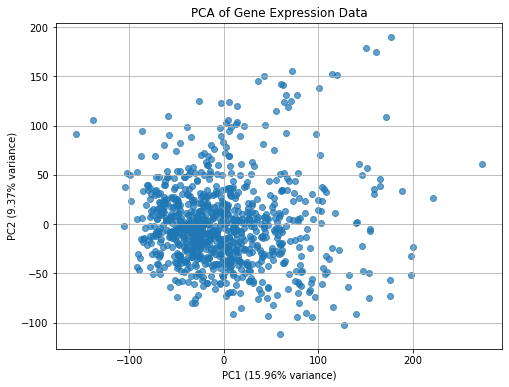

In [56]:
# PCA Visualization
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA of Gene Expression Data")
plt.grid(True)
plt.show()

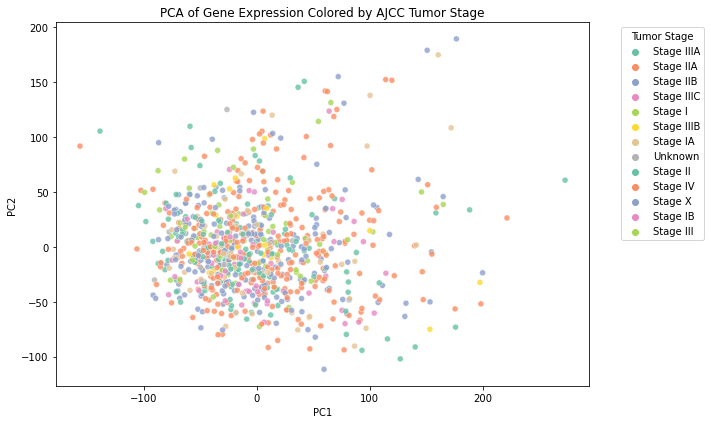

In [57]:
# Turn result into a DataFrame with sample IDs
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=X.index)
pca_df.index.name = 'sample'

clinical_data_pca = female_clinical[['sample', 'ajcc_pathologic_stage.diagnoses']].copy()
clinical_data_pca = female_clinical.dropna(subset=['ajcc_pathologic_stage.diagnoses'])

# Merge on sample IDs
pca_merged = pca_df.merge(female_clinical, left_index=True, right_on='sample')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_merged,
    x='PC1', y='PC2',
    hue='ajcc_pathologic_stage.diagnoses',
    palette='Set2',
    alpha=0.8
)
plt.title('PCA of Gene Expression Colored by AJCC Tumor Stage')
plt.legend(title='Tumor Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### t-SNE

In [58]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100, learning_rate='auto', init='random', random_state=10)
tsne_result = tsne.fit_transform(X)



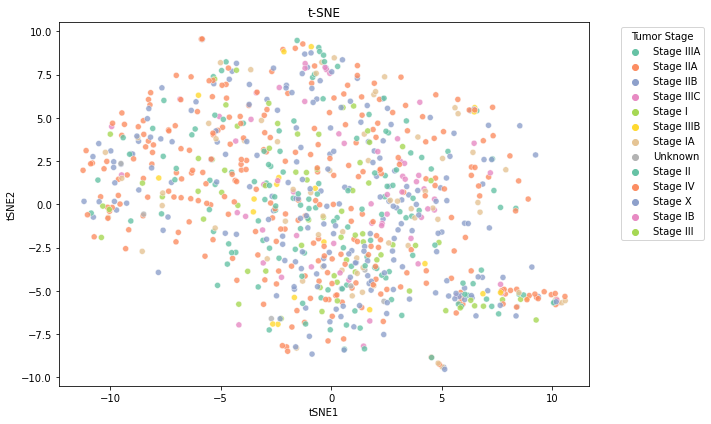

In [59]:
tsne_df = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'], index=X.index)

tsne_df = tsne_df.merge(
    female_clinical[['sample', 'ajcc_pathologic_stage.diagnoses']],
    left_index=True,
    right_on='sample'
)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=tsne_df,
    x='tSNE1', y='tSNE2',
    hue='ajcc_pathologic_stage.diagnoses',
    palette='Set2',
    alpha=0.8
)
plt.title("t-SNE")
plt.legend(title='Tumor Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### UMAP

In [60]:
import umap.umap_ as umap

In [61]:
reducer = umap.UMAP(
    n_neighbors=15,    # try values between 5 and 50
    min_dist=0.1,      # tighter clusters if you lower this
    metric='euclidean',
    random_state=42
)

umap_embedding = reducer.fit_transform(X)

C:\Users\igali\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


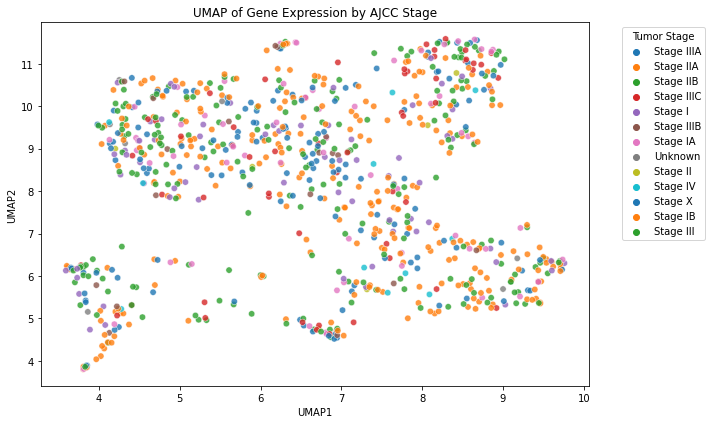

In [62]:
umap_df = pd.DataFrame(
    umap_embedding,
    columns=['UMAP1','UMAP2'],
    index=X.index
).reset_index().rename(columns={'index':'sample'})

# Merge with clinical stage labels
plot_df = umap_df.merge(
    female_clinical[['sample','ajcc_pathologic_stage.diagnoses']],
    on='sample', how='inner'
)

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=plot_df,
    x='UMAP1', y='UMAP2',
    hue='ajcc_pathologic_stage.diagnoses',
    palette='tab10',
    alpha=0.8,
    s=40
)
plt.title("UMAP of Gene Expression by AJCC Stage")
plt.legend(title='Tumor Stage', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

#### Heatmap and hierarchical clustering of top-variable genes

In [63]:
# Compute variance per gene (row)
gene_variances = gene_expression_female.var(axis=1)

# Sort descending and look at top genes
top_500_genes = gene_variances.sort_values(ascending=False).head(500)
print(top_500_genes)

Ensembl_ID
ENSG00000276961    1.0
ENSG00000277892    1.0
ENSG00000274824    1.0
ENSG00000276081    1.0
ENSG00000211871    1.0
                  ... 
ENSG00000108878    1.0
ENSG00000248771    1.0
ENSG00000145996    1.0
ENSG00000136720    1.0
ENSG00000211597    1.0
Length: 500, dtype: float64


c:\Users\igali\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(756.8749999999999, 0.5, 'Top 500 variable genes')

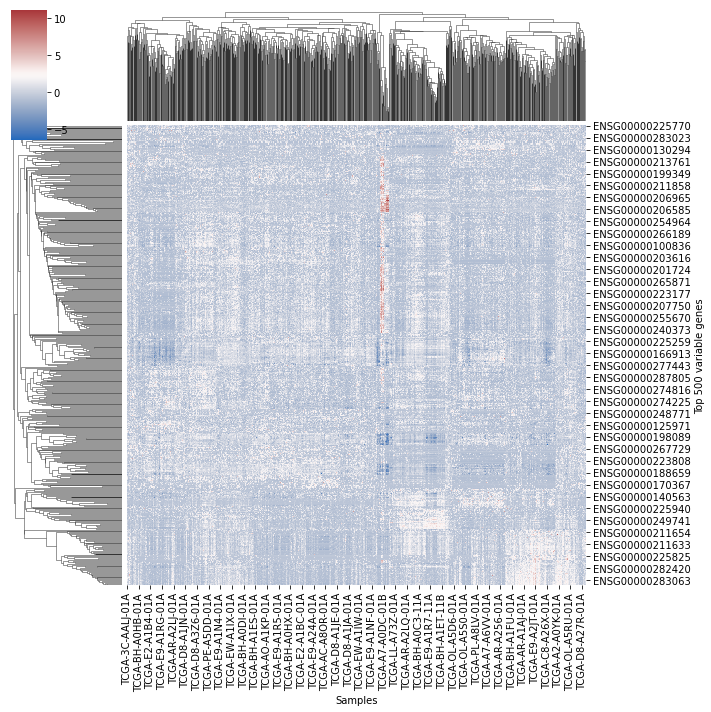

In [64]:
from scipy.cluster.hierarchy import linkage

vars = top_500_genes.index
sub = zscore_gene_expression_female.loc[vars]

g = sns.clustermap(sub, metric='correlation', method='average',
                   col_cluster=True, row_cluster=True,
                   cmap='vlag', figsize=(10,10))
g.ax_heatmap.set_xlabel("Samples")
g.ax_heatmap.set_ylabel("Top 500 variable genes")

#### Silhouette-based clustering

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca = PCA(n_components=20)  # keep top 20 components
X_pca = pca.fit_transform(X)

for k in range(2,10):
    km = KMeans(k, random_state=42).fit(X_pca)  # or X (z-score)
    print(k, silhouette_score(X_pca, km.labels_))

2 0.21015342475213367
3 0.1639839332270919
4 0.17416836995746587
5 0.13939256412062334
6 0.1418630996927792
7 0.13316664867489847
8 0.13269954384417265
9 0.13625498749555462


In [66]:
# k-means on PCA-reduced data
# k=2
n_clusters = 2
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans_model.fit_predict(X_pca)

cluster_df = pd.DataFrame({
    'sample': X.index,
    'cluster': cluster_labels
})

In [67]:
# Merge with PCA scores and clinical stage

pca_scores_df = pd.DataFrame(
    data=X_pca[:, :2],
    columns=['PC1','PC2'],
    index=X.index
).reset_index().rename(columns={'index':'sample'})

plot_df = (
    pca_scores_df
    .merge(cluster_df, on='sample')
    .merge(
      female_clinical[['sample','ajcc_pathologic_stage.diagnoses']], 
      on='sample',
      how='left'
    )
)

In [68]:
print(plot_df['cluster'].value_counts())

1    623
0    243
Name: cluster, dtype: int64


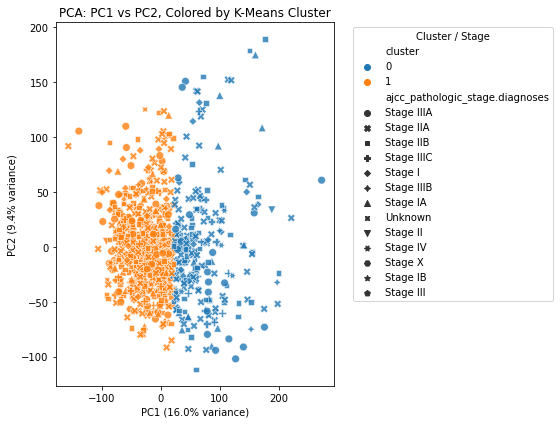

In [69]:
plt.figure(figsize=(8, 6))

# Draw points, coloring by cluster and styling by stage
sns.scatterplot(
    data=plot_df,
    x='PC1', 
    y='PC2',
    hue='cluster',
    style='ajcc_pathologic_stage.diagnoses',  # different markers per stage
    palette=['tab:blue', 'tab:orange'],
    s=60,
    alpha=0.8
)

plt.title("PCA: PC1 vs PC2, Colored by K-Means Cluster")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster / Stage')
plt.tight_layout()

plt.show()

Drop Stage: Unknown/X and Normal Tissue

In [70]:
# Columns in your clinical DataFrame
stage_col       = 'ajcc_pathologic_stage.diagnoses'
sample_type_col = 'sample_type.samples'

# Stages to remove
bad_stages = ['Unknown', 'Stage X', 'TX']

# Keep only primary tumor samples with a known stage
clin_filtered = female_clinical.loc[
    (female_clinical[sample_type_col] == 'Primary Tumor') &
    (~female_clinical[stage_col].isin(bad_stages))
].copy()

# Sanity check
print("Remaining samples:", clin_filtered.shape[0])
print(clin_filtered[stage_col].value_counts())
print(clin_filtered[sample_type_col].value_counts())


Remaining samples: 766
Stage IIA     243
Stage IIB     185
Stage IIIA    126
Stage IA       62
Stage I        60
Stage IIIC     52
Stage IIIB     17
Stage IV       10
Stage II        5
Stage IB        4
Stage III       2
Name: ajcc_pathologic_stage.diagnoses, dtype: int64
Primary Tumor    766
Name: sample_type.samples, dtype: int64


In [71]:
stage_col = 'ajcc_pathologic_stage.diagnoses'

# 1) Use .str.extract() to capture the group of one or more I/V characters
#    (that is, I, II, III or IV) and assign it right back to the same column.
clin_filtered[stage_col] = (
    clin_filtered[stage_col]
      .str.extract(r'Stage\s+([IV]+)', expand=False)
)

# 2) Now that column holds only "I", "II", "III" or "IV"
print(clin_filtered[stage_col].value_counts())

II     433
III    197
I      126
IV      10
Name: ajcc_pathologic_stage.diagnoses, dtype: int64


In [72]:
# merge stage IV with III 
clin_filtered["ajcc_pathologic_stage.diagnoses"] = clin_filtered["ajcc_pathologic_stage.diagnoses"].replace({"III": "III+IV", "IV": "III+IV"})
clin_filtered

,sample,submitter_id,ajcc_pathologic_stage.diagnoses,sample_type.samples,disease_type,primary_diagnosis.diagnoses,ajcc_pathologic_t.diagnoses,ajcc_pathologic_n.diagnoses,ajcc_pathologic_m.diagnoses,age_at_index.demographic
0,TCGA-BH-A0W3-01A,TCGA-BH-A0W3,II,Primary Tumor,Ductal and Lobular Neoplasms,"Infiltrating duct carcinoma, NOS",T1c,N1a,M0,58.0
1,TCGA-AR-A24V-01A,TCGA-AR-A24V,II,Primary Tumor,Ductal and Lobular Neoplasms,"Infiltrating duct carcinoma, NOS",T2,N1,M0,52.0
2,TCGA-E9-A1NE-01A,TCGA-E9-A1NE,II,Primary Tumor,Ductal and Lobular Neoplasms,Infiltrating duct and lobular carcinoma,T2,N1,M0,28.0
4,TCGA-AC-A8OQ-01A,TCGA-AC-A8OQ,II,Primary Tumor,Ductal and Lobular Neoplasms,"Infiltrating duct carcinoma, NOS",T2,N1a,MX,72.0
5,TCGA-AC-A23C-01A,TCGA-AC-A23C,II,Primary Tumor,Ductal and Lobular Neoplasms,"Infiltrating duct carcinoma, NOS",T2,N1,MX,62.0
...,...,...,...,...,...,...,...,...,...,...
1246,TCGA-AR-A254-01A,TCGA-AR-A254,III+IV,Primary Tumor,Ductal and Lobular Neoplasms,"Infiltrating duct carcinoma, NOS",T2,N2,M0,50.0
1247,TCGA-A1-A0SI-01A,TCGA-A1-A0SI,II,Primary Tumor,Ductal and Lobular Neoplasms,"Infiltrating duct carcinoma, NOS",T2,N1a,M0,52.0
1251,TCGA-BH-A1FH-01A,TCGA-BH-A1FH,III+IV,Primary Tumor,Ductal and Lobular Neoplasms,"Infiltrating duct carcinoma, NOS",T2,N1b,M1,47.0
1252,TCGA-AR-A1AO-01A,TCGA-AR-A1AO,II,Primary Tumor,Ductal and Lobular Neoplasms,"Infiltrating duct carcinoma, NOS",T1,N1,M0,47.0


In [73]:
common_ids = (
    set(clin_filtered['sample'])
  & set(zscore_gene_expression_female.columns)
  & set(methylation_imputed.columns)
)
print(f"{len(common_ids)} samples present in every dataset")

clin_filtered = clin_filtered[clin_filtered['sample'].isin(common_ids) ].copy()
zscore_gene_expression_female = gene_expression_female.loc[:, gene_expression_female.columns.isin(common_ids)].copy()
methylation_imputed = methylation_imputed.loc[:, methylation_imputed.columns.isin(common_ids)].copy()

print(clin_filtered.shape)      # (N, …)
print(zscore_gene_expression_female.shape)  # (genes, N)
print(methylation_imputed.shape)     # (probes, N)

766 samples present in every dataset
(766, 10)
(20017, 766)
(189097, 766)


In [74]:
zscore_gene_expression_female.to_csv("preprocessed_gene_expression.csv", index=True)
#clin_filtered.to_csv("preprocessed_clinical_data.csv", index=False)
methylation_imputed.to_csv("preprocessed_methylation_data.csv", index=True)

In [75]:
print(methylation_imputed.shape)

(189097, 766)


In [76]:
from sklearn.model_selection import train_test_split

# Split into 80% train, 20% test
train_df_clinical, test_df_clinical = train_test_split(
    clin_filtered,
    test_size=0.2,
    random_state=42,      
    stratify=clin_filtered['ajcc_pathologic_stage.diagnoses']
)

print("Train shape:", train_df_clinical.shape)
print("Test shape:", test_df_clinical.shape)

Train shape: (612, 10)
Test shape: (154, 10)


In [77]:
train_df_clinical.to_csv("preprocessed_clinical_train.csv", index=False)
test_df_clinical.to_csv("preprocessed_clinical_test.csv", index=False)